# External Lab 

Here each question is of 1 mark.

# Multiple Linear Regression

## Problem Statement

Use Multiple Linear Regression to **predict the consumption of petrol** given relevant variables are the petrol tax, the per capita, income, the number of miles of paved highway, and the proportion of the population with driver's licenses.

## Dataset

There are 48 rows of data.  The data include:

      I,  the index;
      A1, the petrol tax;
      A2, the per capita income;
      A3, the number of miles of paved highway;
      A4, the proportion of drivers;
      B,  the consumption of petrol.

### Reference 

    Helmut Spaeth,
    Mathematical Algorithms for Linear Regression,
    Academic Press, 1991,
    ISBN 0-12-656460-4.

    S Weisberg,
    Applied Linear Regression,
    New York, 1980, pages 32-33.

## Question 1 - Exploratory Data Analysis

*Read the dataset given in file named **'petrol.csv'**. Check the statistical details of the dataset.*

**Hint:** You can use **df.describe()**

In [225]:
import pandas as pd
import numpy as np

In [226]:
df_petrol = pd.read_csv('petrol.csv')
df_petrol.columns = df_petrol.columns.str.replace(' ','')

In [227]:
df_petrol.head(5)

,tax,income,highway,dl,consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [228]:
df_petrol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
tax            48 non-null float64
income         48 non-null int64
highway        48 non-null int64
dl             48 non-null float64
consumption    48 non-null int64
dtypes: float64(2), int64(3)
memory usage: 1.9 KB


# Question 2 - Cap outliers 

Find the outliers and cap them. (Use (Q1 - 1.5 * IQR) as the minimum cap and (Q3 + 1.5 * IQR) as the max cap. The decision criteria is you should consider the datapoints which only falls within this range. The data points which fall outside this range are outliers and the entire row needs to be removed

In [229]:
Q1 = df_petrol.quantile(0.25)
Q1

tax               7.00000
income         3739.00000
highway        3110.25000
dl                0.52975
consumption     509.50000
Name: 0.25, dtype: float64

In [230]:
Q3 = df_petrol.quantile(0.75)
Q3

tax               8.12500
income         4578.75000
highway        7156.00000
dl                0.59525
consumption     632.75000
Name: 0.75, dtype: float64

In [231]:
IQR = Q3 - Q1
IQR

tax               1.1250
income          839.7500
highway        4045.7500
dl                0.0655
consumption     123.2500
dtype: float64

In [232]:
lower_bound = Q1 - (1.5 * IQR)
lower_bound
upper_bound = Q3 + (1.5 * IQR)
upper_bound

tax                9.8125
income          5838.3750
highway        13224.6250
dl                 0.6935
consumption      817.6250
dtype: float64

In [233]:
df_petrol = df_petrol[(df_petrol > lower_bound) & (df_petrol < upper_bound)]

In [234]:
df_petrol_new = df_petrol.dropna()

In [235]:
df_petrol_new.head(10)

,tax,income,highway,dl,consumption
0,9.0,3571,1976.0,0.525,541.0
1,9.0,4092,1250.0,0.572,524.0
2,9.0,3865,1586.0,0.580,561.0
3,7.5,4870,2351.0,0.529,414.0
4,8.0,4399,431.0,0.544,410.0
6,8.0,5319,11868.0,0.451,344.0
7,8.0,5126,2138.0,0.553,467.0
8,8.0,4447,8577.0,0.529,464.0
9,7.0,4512,8507.0,0.552,498.0
10,8.0,4391,5939.0,0.530,580.0


# Question 3 - Independent variables and collinearity 
Which attributes seems to have stronger association with the dependent variable consumption?

In [236]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

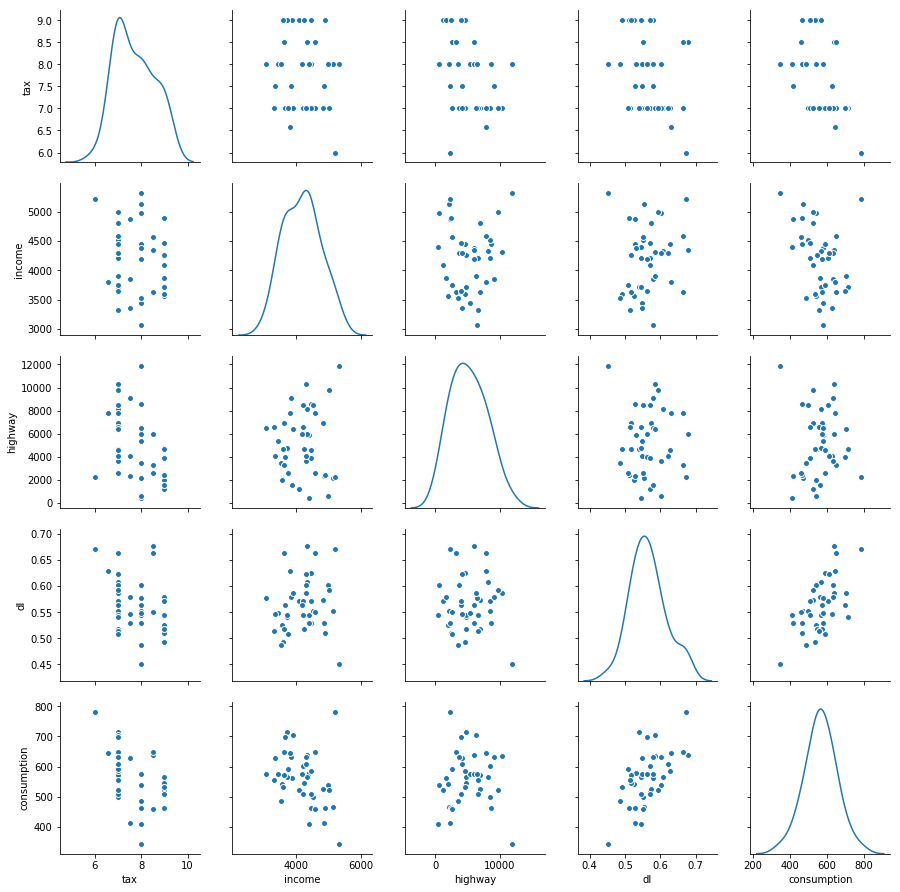

In [237]:
sns.pairplot( df_petrol_new , diag_kind='kde')

In [238]:
df_petrol_new.corr()

,tax,income,highway,dl,consumption
tax,1.000000,-0.109537,-0.390602,-0.314702,-0.446116
income,-0.109537,1.000000,0.051169,0.150689,-0.347326
highway,-0.390602,0.051169,1.000000,-0.016193,0.034309
dl,-0.314702,0.150689,-0.016193,1.000000,0.611788
consumption,-0.446116,-0.347326,0.034309,0.611788,1.000000


In [239]:
#Looking at the graph we can make out that dl variable has the stronger association with the dependent variable consumption.i.e.0.6
#Both the variable increase wrt to the other.

### Observing the above correlation values between all the variables, we can see that there is stronger association between the number of drivers and consumption. And comparatively tax has an association in a negative way. 
Insights :
As tax increases the consumption decreases.
As number of drivers is more consumption is more

# Question 4 - Transform the dataset 
Divide the data into feature(X) and target(Y) sets.

In [240]:
x = df_petrol_new[["tax","dl"]]

In [241]:
y = df_petrol_new[["consumption"]]

# Question 5 - Split data into train, test sets 
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.

In [242]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [243]:
test_size = 0.20
seed = 1
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

In [244]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(34, 2)
(9, 2)
(34, 1)
(9, 1)


# Question 6 - Build Model 
Estimate the coefficients for each input feature. Construct and display a dataframe with coefficients and X.columns as columns

In [245]:
model = LinearRegression()

In [246]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [247]:
model.coef_

array([[-30.70924255, 892.88620875]])

In [248]:
model.intercept_

array([292.55096525])

In [249]:
df_coefficient = pd.DataFrame(model.coef_,columns=x.columns)
df_coefficient

,tax,dl
0,-30.709243,892.886209


# R-Square 

# Question 7 - Evaluate the model 
Calculate the accuracy score for the above model.

In [250]:
trainR = model.score(X_train,y_train)
testR = model.score(X_test,y_test)
print(trainR)
print(testR)

0.4657867429910155
0.2876056314158515


# Question 8: Repeat the same Multi linear regression modelling by adding both Income and Highway features
Find R2 


In [215]:
x1 = df_petrol_new[["tax","dl","income","highway"]]

In [216]:
X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y, test_size=test_size, random_state=seed)

In [218]:
print(X1_train.shape)
print(X1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(34, 4)
(9, 4)
(34, 1)
(9, 1)


In [219]:
model1 = LinearRegression()
model1.fit(X1_train,y1_train)
model1.coef_
model1.intercept_
df_coefficient1 = pd.DataFrame(model1.coef_,columns=x1.columns)
df_coefficient1

,tax,dl,income,highway
0,-39.411584,950.882744,-0.062628,-0.003022


In [220]:
trainR1 = model1.score(X1_train,y1_train)
testR1 = model1.score(X1_test,y1_test)
print(trainR1)
print(testR1)

0.6407622941321006
0.6930212207099561


# Question 9: Print the coefficients of the multilinear regression model

In [222]:
model1.coef_

array([[-3.94115836e+01,  9.50882744e+02, -6.26281401e-02,
        -3.02198704e-03]])

In [223]:
model1.intercept_

array([607.71890891])

# Question 10 
In one or two sentences give reasoning on R-Square on the basis of above findings
Answer

### *R squared value increase if we increase the number of independent variables to our analysis

In [224]:
#As per the above analysis, if we increase the number of independent variable the R squared value is increased and there is very less difference in the Train and test values.